In [66]:
import numpy as np
from scipy.linalg import eig
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

imgloc = r'D:/Uni/Master/Mulitscale_methods/DFT/tex/images'
dataloc = r'D:\Uni\Master\Mulitscale_methods\DFT\Code\Data'

def img_loc(loc: str):
    return rf'{imgloc}/{loc}'

def data_loc(loc: str):
    return rf'{dataloc}/{loc}'

def Eigenvalues(v0, b_a, ka, m_size):  # https://sci-hub.se/10.1119/1.4923026
    matrix = np.zeros((m_size, m_size))
    half = m_size//2
    n_values = []
    for n in range(0, m_size):
        nv = (n - half)
        # nv = n
        n_values.append(nv)
        for m in range(0, m_size):
            mv = (m - half)
            # mv = m
            if nv == mv:
                matrix[n, m] = (2*nv*np.pi + ka)**2 - v0*b_a
                # matrix[n, m] = nv**2
            else:
                matrix[n, m] = -v0*np.sin(np.pi*(nv-mv)*b_a)/(np.pi*(nv-mv))
    values, vectors = eig(matrix)
    # values, vectors = eigs(matrix, m_size-2, sigma=-10)
    mask = np.argsort(values)
    n_values = np.array(n_values)
    return values[mask], vectors.T[mask], n_values

def values(vectors, n_values, x, index):
    return np.sum(vectors[:, index]*np.exp(1j*x[:, None]*n_values*2*np.pi), axis=1)

def ifft(vectors, x):
    half2 = vectors.shape[-1] // 2
    vecs = np.roll(vectors, half2, axis=-1)
    ifft_vecs = np.fft.ifft(vecs, axis=1)
    real_ifft_vecs = np.real(ifft_vecs*np.conj(ifft_vecs))
    integral = np.trapz(real_ifft_vecs, x, axis=1)
    return real_ifft_vecs/integral[:, None]

# a

[ 0.49479231+0.j 39.97683448+0.j 39.98316638+0.j]


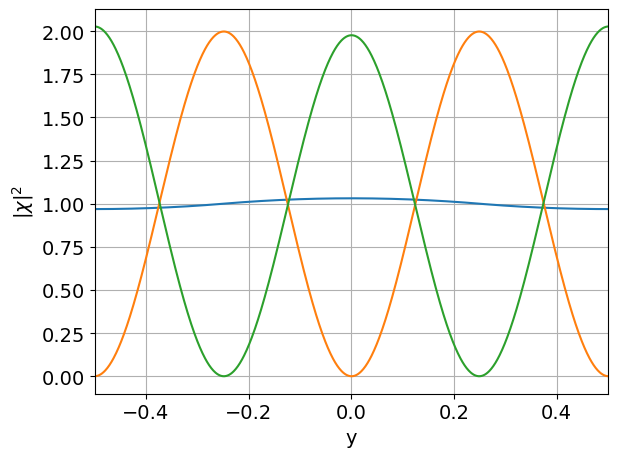

In [229]:
points = 1000
eigen_values, eigen_vectors, reciprocal_grid = Eigenvalues(-1, 1/2, 0, points)
x = np.linspace(-0.5, 0.5, points)
result = ifft(eigen_vectors, x)

index=3
print(eigen_values[:index])
plt.figure()
plt.plot(x, result[: index].T)
plt.xlim(x[0], x[-1])
plt.ylabel('$|\chi|^2$')
plt.xlabel('y')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('3_a.png'))
plt.show()

In [220]:
num = 100
values_num = 10
points_arr = np.unique(np.geomspace(values_num, 1000, num, dtype=int))
v0 = -1
values_res = np.zeros((len(points_arr), values_num))
for index, points in enumerate(points_arr):
    eigen_values, _, _ = Eigenvalues(-v0, 1/2, 0, points)
    values_res[index] = eigen_values[:values_num]
    print(f'\r {index+1} of {len(points_arr)}', end='')
print('')

C:\Users\drost\AppData\Local\Temp\ipykernel_17964\1687094633.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  values_res[index] = eigen_values[:values_num]


 95 of 95


[271, 271, 81, 271, 93, 869, 178, 271, 129, 312]
[-0.5052076872412905, 38.9768344796593, 38.98316638174537, 157.4132746423551, 157.41485775498606, 354.8055825373908, 354.80628615054763, 631.1545827246329, 631.1549785081969, 986.4603767836827]


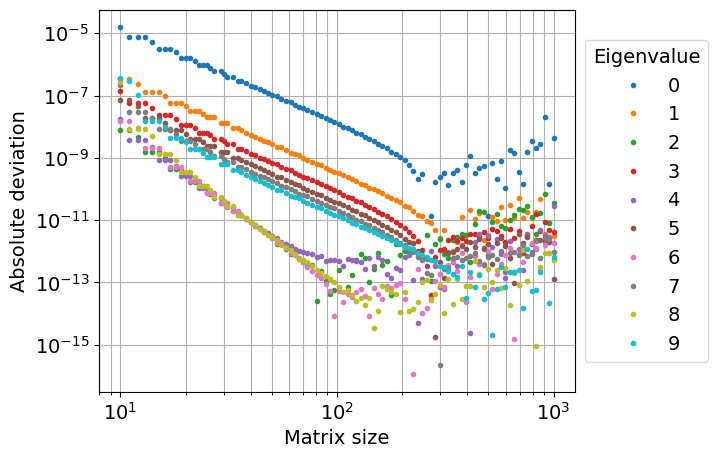

In [228]:
index = np.searchsorted(points_arr > 80, 0.5)

values = [points_arr[index+np.argmin(np.convolve(abs(np.diff(values_res[index:, i])), np.ones(3)/3, mode='same'))] for i in range(values_res.shape[-1]) ]
best_vals = [values_res[index+np.argmin(abs(np.diff(values_res[index:, i]))), i] for i in range(values_res.shape[-1]) ]

print(values)
print(best_vals)

plt.figure(figsize=[7.4, 4.8])
lines = plt.loglog(points_arr, abs(values_res/np.array(best_vals)-1), '.')
# plt.yscale('symlog')
plt.grid(which='both')
plt.legend(lines, np.arange(values_res.shape[-1]), title='Eigenvalue', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Matrix size')
plt.ylabel('Absolute deviation')
plt.tight_layout()
plt.savefig(img_loc('3_a_2.png'))
plt.show()

In [231]:
points = 250
num = 100
values_num = 3
v0s = np.logspace(-1, 10, num)
values_res = np.zeros((num, values_num))
for index, v0 in enumerate(v0s):
    eigen_values, _, _ = Eigenvalues(-v0, 1/2, 0, points)
    values_res[index] = eigen_values[:values_num]
    print(f'\r {index} of {num}', end='')
print('')

print(values_res[-1])

C:\Users\drost\AppData\Local\Temp\ipykernel_17964\2467770954.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  values_res[index] = eigen_values[:values_num]


 99 of 100
[ 40.48191122 161.92785806 364.33928185]


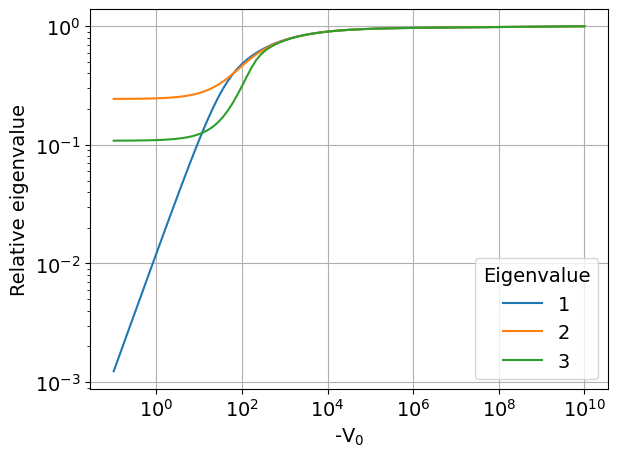

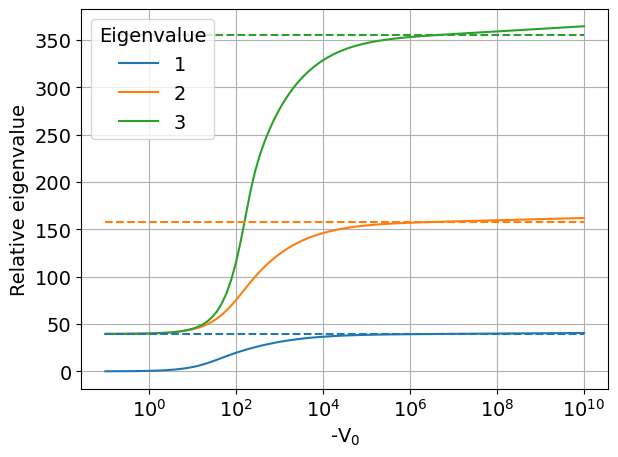

In [232]:
plt.figure()
lines = plt.loglog(v0s, values_res/values_res[-1])
plt.legend(lines, ['1', '2', '3'], title='Eigenvalue')
plt.xlabel('-V$_0$')
plt.ylabel('Relative eigenvalue')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('3_b_1_rel.png'))
plt.show()

plt.figure()
lines = plt.semilogx(v0s, values_res)
for n in [2, 4, 6]:
    plt.plot([v0s[0], v0s[-1]], [np.pi**2*n**2, np.pi**2*n**2], f'C{n/2-1:.0f}--')
plt.legend(lines, ['1', '2', '3'], title='Eigenvalue')
plt.xlabel('-V$_0$')
plt.ylabel('Relative eigenvalue')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('3_b_1_abs.png'))
plt.show()

[2.00399587+0.j 4.00799181+0.j 6.01198781+0.j]


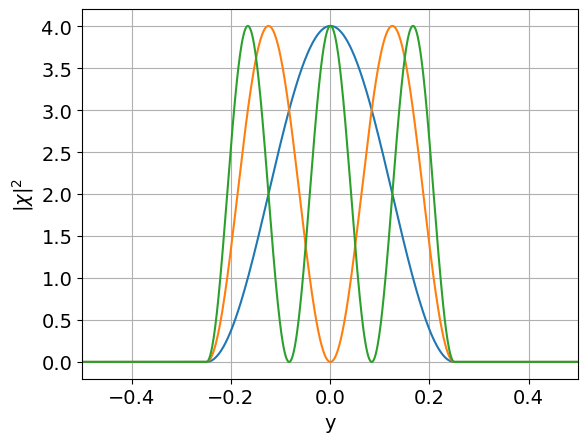

In [111]:
points = 1000
eigen_values, eigen_vectors, reciprocal_grid = Eigenvalues(-1e10, 1/2, 0, points)
x = np.linspace(-0.5, 0.5, points)
result = ifft(eigen_vectors, x)

index=3
print(np.sqrt(eigen_values[:index])/np.pi)
plt.figure()
plt.plot(x, result[: index].T)
plt.xlim(x[0], x[-1])
plt.ylabel('$|\chi|^2$')
plt.xlabel('y')
plt.grid()
plt.savefig(img_loc('3_b_2.png'))
plt.show()

C:\Users\drost\AppData\Local\Temp\ipykernel_17964\3822678021.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  res[i] = eigen_values[:num2]


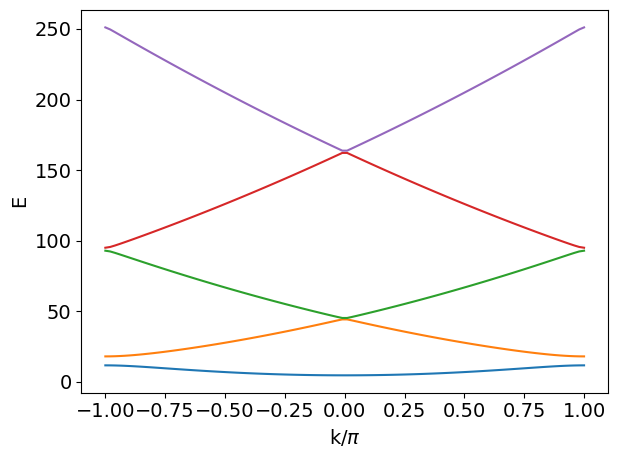

In [233]:
num = 100
num2 = 5
m_size = 101
half = (m_size-1)/2
b_a = 0.5
v0 = -10
res = np.zeros((num, num2))
ka_values = np.linspace(-np.pi, np.pi, num)

for i, k in enumerate(ka_values):
    eigen_values, eigen_vectors, reciprocal_grid = Eigenvalues(v0, b_a, k, 50)
    res[i] = eigen_values[:num2]

plt.figure()
plt.plot(ka_values/np.pi, res)
plt.xlabel(r'k$/\pi$')
plt.ylabel('E')
plt.tight_layout()
plt.show()

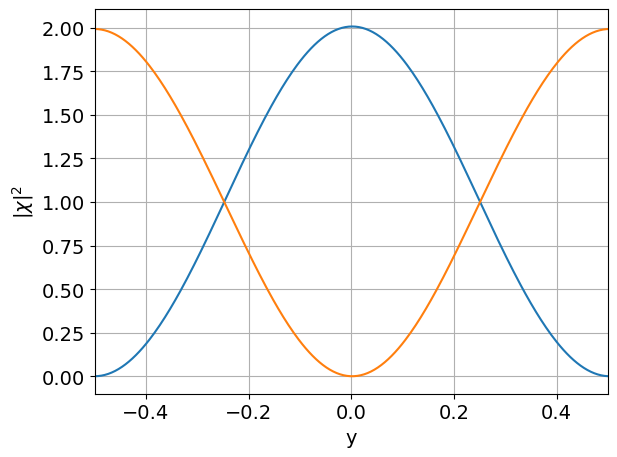

In [234]:
points = 300
eigen_values, eigen_vectors, reciprocal_grid = Eigenvalues(-1, 1/2, np.pi, points)
x = np.linspace(-0.5, 0.5, points)
result = ifft(eigen_vectors, x)

index=2
plt.figure()
plt.plot(x, result[: index].T)
plt.xlim(x[0], x[-1])
plt.ylabel('$|\chi|^2$')
plt.xlabel('y')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('3_c_2.png'))
plt.show()
